In [1]:
#!pip install opencv-python

# Discrete Cosine Transform

This notebook is for the sole purpose of understanding and playing around with the discreet cosine transform

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.DCT import DCT
from src.quantizer import Quantizer
from src.huffman import Huffman
from src.JPEG import JPEG
from src.run_length_code import RunLengthCode
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
import scipy

In [5]:
basis = DCT.get_basis()
quantizer = Quantizer()


In [6]:
basis.min()

-0.9807852804032307

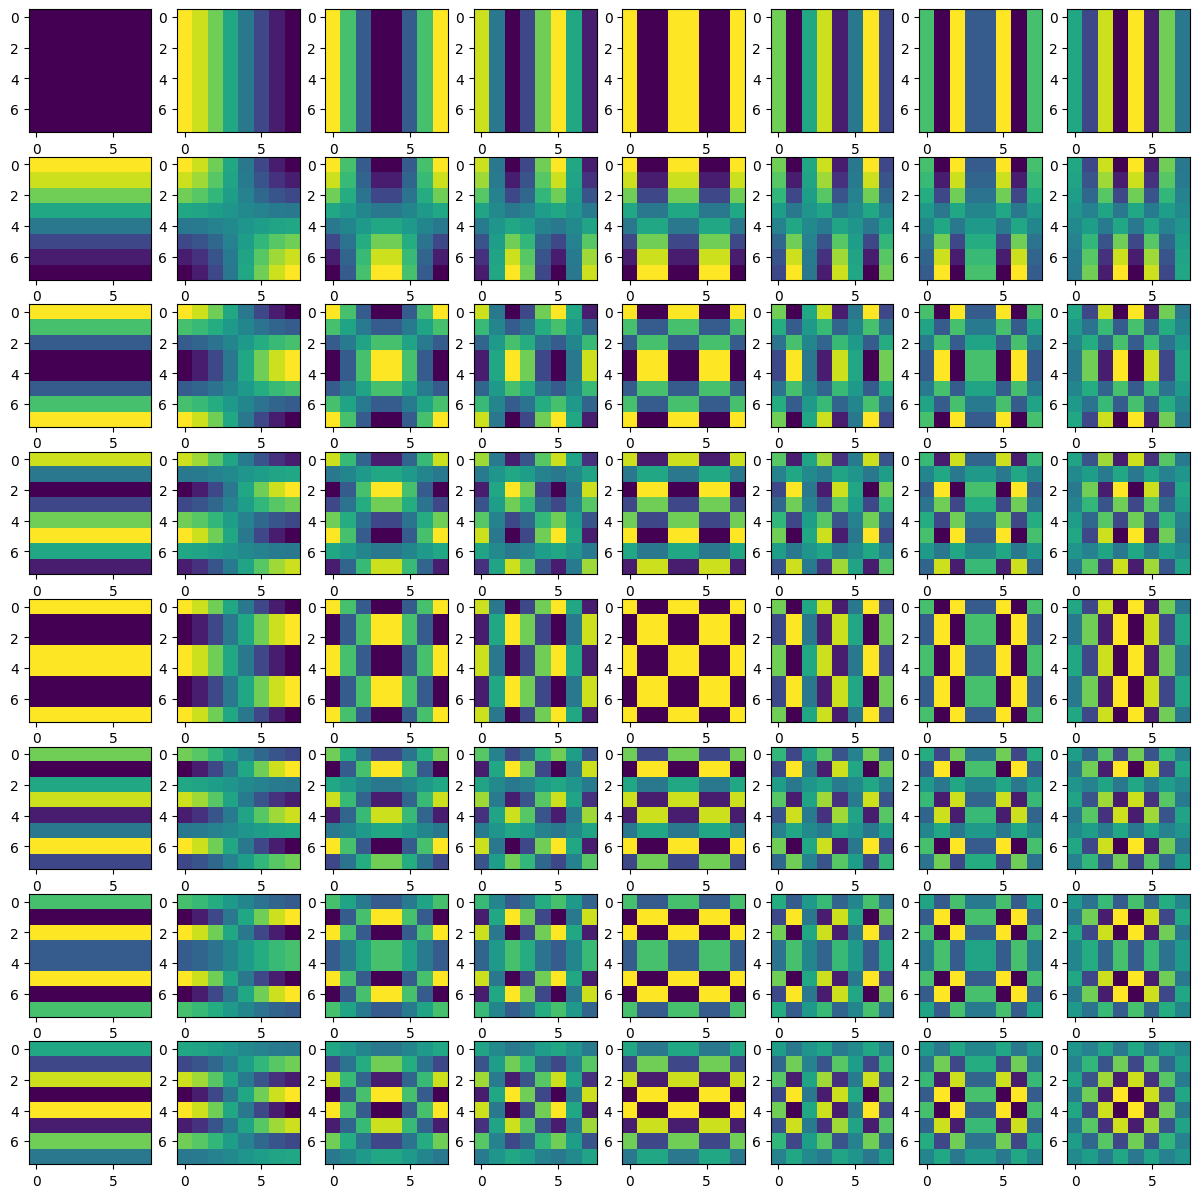

In [7]:
fig, ax = plt.subplots(8,8, figsize=(15,15))

for i in range(8):
    for j in range(8):
        ax[i, j].imshow(basis[i][j])
plt.show()

In [8]:
img = cv2.imread("B2DBy.jpg")

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
jpeg = JPEG(img_gray)

In [11]:
img_gray = jpeg.zero_padding(img_gray)

In [12]:
#img_gray = img_gray[0:296, 0:328]

In [13]:
img_gray.shape

(304, 336)

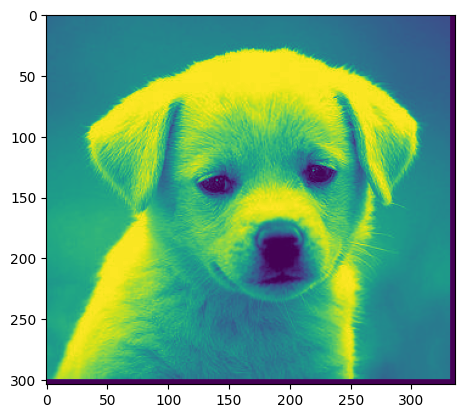

In [14]:
plt.imshow(img_gray)

In [15]:
fig_dct = DCT.DCT(img_gray)

In [16]:
fig_dct.shape

(304, 336)

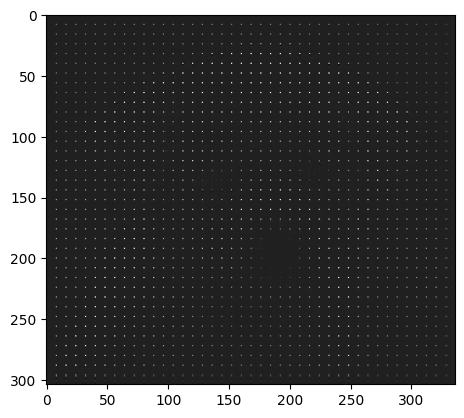

In [17]:
plt.imshow( fig_dct, cmap="gray")

In [18]:
fig_dct

array([[ 9.10000000e+01, -5.10041293e-01,  4.55535393e-01, ...,
         9.15132159e+00,  2.59695300e-02, -7.74787340e+00],
       [-1.05702092e+00, -1.49282760e-02, -1.71520841e-02, ...,
        -8.43180184e-02,  1.17290712e-02,  7.97415619e-02],
       [-8.45618906e-03,  1.95170337e-02,  3.77220869e-02, ...,
        -1.60399990e-02,  2.02014565e-02,  2.90906410e-02],
       ...,
       [ 2.49761854e+01, -2.10079828e+00,  6.73611370e-01, ...,
         2.29665090e+00,  1.43827953e-02, -1.93663720e+00],
       [ 1.67061603e-02,  3.29944130e-03,  9.99200722e-16, ...,
        -4.99600361e-16,  8.88178420e-16,  2.10942375e-15],
       [-2.11177761e+01,  1.79550440e+00, -5.71060145e-01, ...,
        -1.94700662e+00, -1.21931451e-02,  1.64180174e+00]])

In [19]:
fig_quantized = quantizer.High_compression(fig_dct)
fig_quantized

array([[91,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [20]:
fig_quantized.min()

-76

In [21]:
import numpy as np

In [22]:
def minmax_scaler(arr , vmin=0, vmax=1):
    arr_min, arr_max = arr.min(), arr.max()
    new_arr = ((arr - arr_min) / (arr_max - arr_min))*(vmax - vmin) + vmin
    return new_arr.astype(np.int32)


In [23]:
#fig_quantized = minmax_scaler(fig_quantized, 0, 255)
fig_quantized

array([[91,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

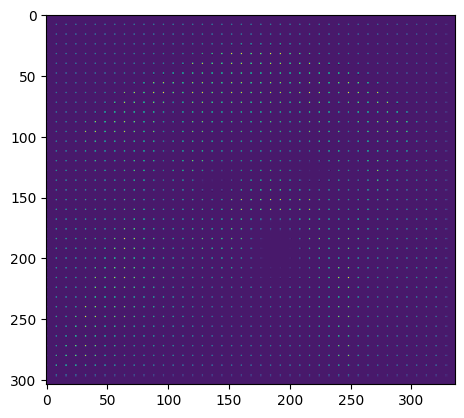

In [24]:
plt.imshow(fig_quantized)

In [25]:
fig_quantized.shape

(304, 336)

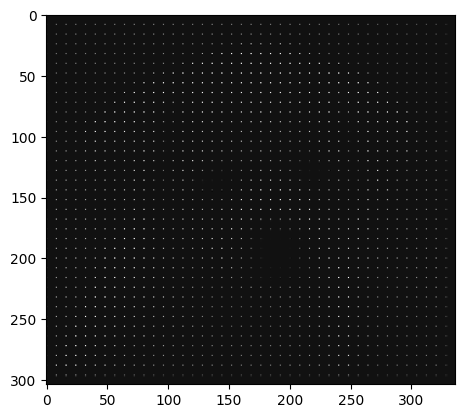

In [26]:
plt.imshow( fig_quantized, cmap="gray")

In [27]:
vector = jpeg.img2vector(fig_quantized).astype(np.int32)
vector


array([91,  0,  0, ...,  0,  0,  0])

In [28]:
vector_run_lenght = RunLengthCode.encode(vector)
vector_run_lenght

'91,0,63,188,0,1,-1,0,61,197,0,1,-1,0,61,201,0,1,-1,0,61,202,0,63,208,0,63,213,0,1,-1,0,61,218,0,1,-1,0,61,220,0,63,222,0,1,-1,0,61,222,0,63,222,0,1,-1,0,61,218,0,1,-1,0,61,216,0,1,-1,0,61,216,0,1,-1,0,61,216,0,63,218,0,63,214,0,1,-1,0,61,212,0,1,-1,0,61,212,0,1,-1,0,61,212,0,1,-1,0,61,212,0,1,-1,0,61,214,0,63,213,0,1,-1,0,61,211,0,1,-1,0,61,209,0,1,-1,0,61,206,0,63,198,0,1,-1,0,61,196,0,63,189,0,1,-1,0,61,182,1,-1,0,61,176,0,1,-1,0,61,170,0,63,164,0,63,158,0,63,154,0,1,-1,0,61,146,0,63,142,0,63,136,0,63,132,0,63,126,0,63,61,19,0,4,-1,0,57,188,-1,0,62,392,-1,0,62,404,0,63,411,-1,0,62,415,-1,-1,0,61,428,-2,-1,0,61,436,-1,0,62,444,0,63,451,-1,-1,0,61,460,0,1,-1,0,61,456,0,1,-2,0,61,456,0,1,-1,0,61,452,0,63,451,1,-2,0,61,447,1,0,62,448,0,1,-1,0,61,448,0,1,-1,0,61,448,0,1,-1,0,61,440,0,1,-1,0,61,440,0,1,-1,0,61,440,0,1,-2,0,61,440,0,1,-2,0,61,444,-1,-2,0,61,444,0,1,-1,0,61,440,1,0,62,436,1,-1,0,61,427,1,-2,0,61,420,1,-2,0,61,412,1,-2,0,61,400,1,-2,0,61,384,1,-2,0,61,368,2,-2,0,61,356,1,-1,

In [29]:
H = Huffman(vector_run_lenght)
encoded = H.encode(vector_run_lenght)
encoded

'110110101011110100010011010110010100100111101010110010101111010001010101110110110111011110101011001010111101000101011101111110101111010101100101011110100010101110111111110101111010001001101110111111001001111010001001101110110110011011110101011001010111101000101011101101100100111101010110010101111010001010111011110111110111101000100110111011110111101011110101011001010111101000101011101111011110101111010001001101110111101111010111101010110010101111010001010111011011001001111010101100101011110100010101110110110000111101010110010101111010001010111011011000011110101011001010111101000101011101101100001111010001001101110110110010011110100010011011101101110100111101010110010101111010001010111011011110101111010101100101011110100010101110110111101011110101011001010111101000101011101101111010111101010110010101111010001010111011011110101111010101100101011110100010101110110111010011110100010011011101101100110111101010110010101111010001010111011011010111101010110010101111010001010111011111110110011

In [30]:
decoded = H.decode(encoded)
decoded

[91.0,
 0.0,
 63.0,
 188.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 197.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 201.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 202.0,
 0.0,
 63.0,
 208.0,
 0.0,
 63.0,
 213.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 218.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 220.0,
 0.0,
 63.0,
 222.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 222.0,
 0.0,
 63.0,
 222.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 218.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 216.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 216.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 216.0,
 0.0,
 63.0,
 218.0,
 0.0,
 63.0,
 214.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 212.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 212.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 212.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 212.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 214.0,
 0.0,
 63.0,
 213.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 211.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 209.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 206.0,
 0.0,
 63.0,
 198.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 61.0,
 196.0,
 0.0,
 63.0,
 189.0,
 0.0,
 1.0,
 -1.0,
 0.0

In [31]:
r = RunLengthCode.decode(decoded)
r

array([91.,  0.,  0., ...,  0.,  0.,  0.])

In [32]:
combine_back = jpeg.vector2img(r,fig_quantized.shape)

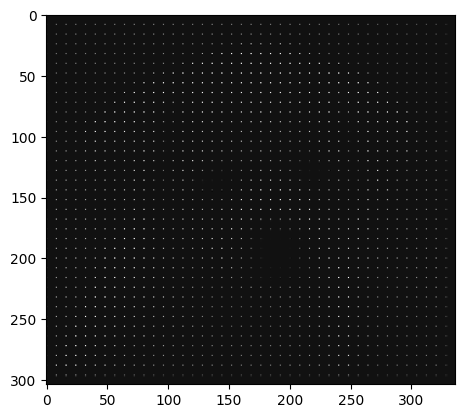

In [33]:
plt.imshow( combine_back, cmap="gray")

In [34]:
fig_dequantized = quantizer.reverse_High_compression(combine_back)

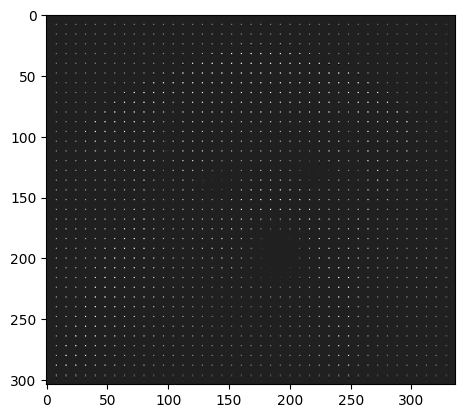

In [35]:
plt.imshow( fig_dequantized, cmap="gray")

In [36]:
idct = DCT.IDCT(fig_dequantized)

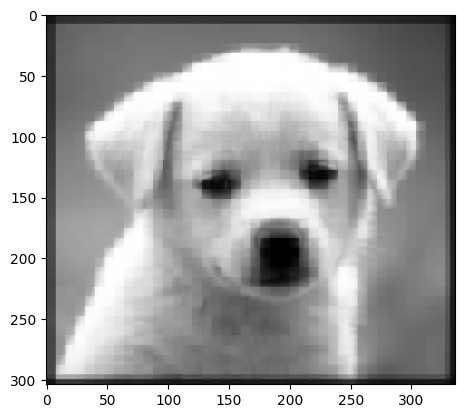

In [37]:
plt.imshow( idct, cmap="gray")

In [38]:
jbeg = JPEG(img_gray)

In [39]:
compress = jbeg.compress(img_gray)

In [40]:
decompress = jbeg.decompress(compress)

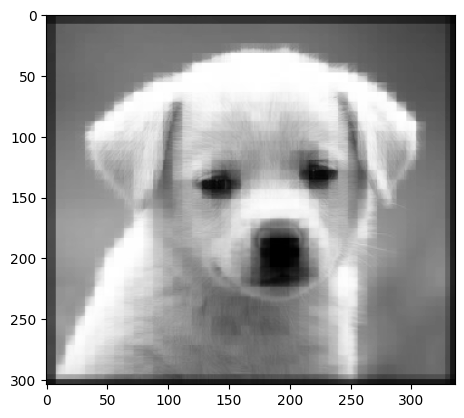

In [41]:
plt.imshow(decompress, cmap="gray")

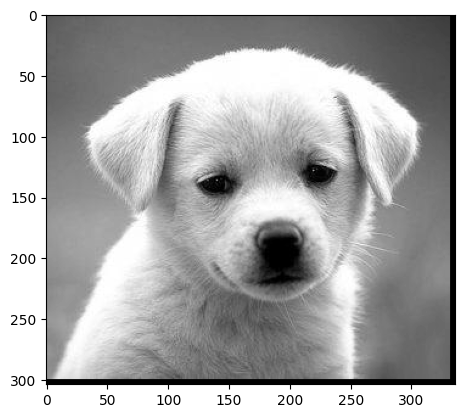

In [42]:
plt.imshow(img_gray, cmap="gray")

In [43]:
huffman_code_file = open("img_encoded.txt", "w") 

In [44]:
huffman_code_file.write(encoded)

96665

In [45]:
huffman_code_file.close()

In [46]:
import os

In [47]:
path = os.getcwd()+"\\"+"img_encoded.txt"

In [48]:
file_stats = os.stat(path)
file_stats.st_size

96665

In [49]:
path = os.getcwd()+"\\"+"B2DBy.jpg"

In [50]:
file_stats = os.stat(path)
file_stats.st_size

13601

In [51]:
len(encoded)

96665

In [52]:
from sys import getsizeof

In [53]:
getsizeof(img_gray)

817280

In [54]:
img_gray.shape[0]*img_gray.shape[1]

102144

In [55]:
ratio = len(encoded)/817280*100
ratio

11.827647807361002